# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

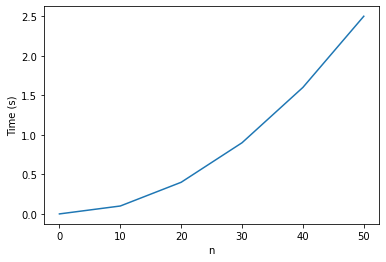

In [9]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

#  Fibonnacci By Recursion

832040


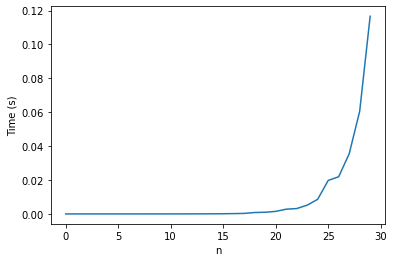

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


def fib_recurs(n):
    if n <= 2:
        return 1
    else :
        return fib_recurs(n-1) + fib_recurs(n-2)

print(fib_recurs(30))
    
def timeit(n):
    start = time.time()
    fib_recurs(n)
    end = time.time()
    return end-start
    
N = [i for i in range(0,30)]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

# Fibonacci by table

832040


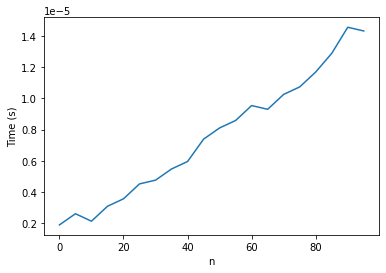

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


def fib_table(n):
    table = {0: 0, 1: 1}
    for i in range(2, n+1):
        new = table[i - 1] + table[i - 2]
        table[i] = new
    return table[n]

print(fib_table(30))
def timeit(n):
    start = time.time()
    fib_table(n)
    end = time.time()
    return end-start
    
N = [i for i in range (0, 100, 5)]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');


    

# Fibonacci by keeping last two values

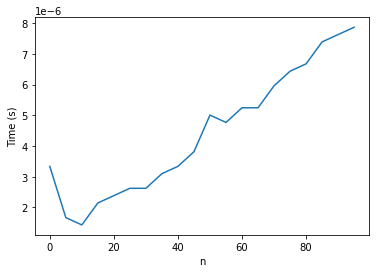

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time



def fib_two(n):
    a = 0
    b = 1

    for i in range(2, n+1):
        a,b = b, a + b
    return b

def timeit(n):
    start = time.time()
    fib_two(n)
    end = time.time()
    return end-start
    
N = [i for i in range(0, 100, 5)]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');



# Analytic


In [8]:
import math

def fib_anal(n):
    golden_ratio = (1 + 5 ** 0.5) / 2

    return (golden_ratio**n - (1-golden_ratio)**n)/(5**0.5)

def fib_table(n):
    table = {0: 0, 1: 1}
    for i in range(2, n+1):
        new = table[i - 1] + table[i - 2]
        table[i] = new
    return table[n]


n = 1
while n < 71:
    print (fib_table(n))
    print(fib_anal(n))
    n += 1
    
    
    


1
1.0
1
1.0
2
2.0
3
3.0000000000000004
5
5.000000000000001
8
8.000000000000002
13
13.000000000000002
21
21.000000000000004
34
34.00000000000001
55
55.000000000000014
89
89.00000000000003
144
144.00000000000006
233
233.00000000000006
377
377.00000000000017
610
610.0000000000003
987
987.0000000000005
1597
1597.000000000001
2584
2584.000000000002
4181
4181.000000000003
6765
6765.000000000005
10946
10946.000000000007
17711
17711.00000000001
28657
28657.000000000022
46368
46368.00000000004
75025
75025.00000000006
121393
121393.00000000009
196418
196418.00000000017
317811
317811.0000000003
514229
514229.00000000047
832040
832040.0000000008
1346269
1346269.0000000012
2178309
2178309.0000000023
3524578
3524578.0000000037
5702887
5702887.0000000065
9227465
9227465.000000011
14930352
14930352.000000019
24157817
24157817.000000026
39088169
39088169.000000045
63245986
63245986.00000007
102334155
102334155.00000013
165580141
165580141.00000024
267914296
267914296.00000036
433494437
433494437.000000

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```